In [18]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
import pandas as pd
import math

dns_flows_File = '../../sgrover/data/1hour-night/split_hour_00002_20170124015900.csv'

sql_sc = SQLContext(sc)

def add_domain(domain):
    n_levels = 3
    tmp = domain.split('.')
    out = []
    for level in range(1, 1+n_levels):
        out.append('.'.join(tmp[-level:]))
    return out

def fix_unicode_issue(domain):
    try:
        out = str(domain)
    except:
        out = ''
    return out
        
    

pandas_df = pd.read_csv(dns_flows_File, sep="|", error_bad_lines=False,
               names=['time', 'srcip', 'dstip', 'dnsquery']).dropna() 
# pandas_df = pd.read_csv('file.csv', names = ['column 1','column 2']) # if no header
s_rdd = sql_sc.createDataFrame(pandas_df).rdd
s_rdd.count()

1099284

In [20]:
augmented_data = (s_rdd
                  .map(lambda s: tuple([str(x) for x in s[:-1]]+[fix_unicode_issue(s[3])]))
                  # add different level domains as columns
                  .map(lambda s: tuple([str(x) for x in s]+add_domain(str(s[3]))))
                  # time in seconds
                  .map(lambda s: tuple([int(float(s[0]))]+[str(x) for x in s[1:]]))
                  
                 )
print augmented_data.take(2)

[(0, '10.9.186.52', '10.8.0.5', 'www.youtube.com', 'com', 'youtube.com', 'www.youtube.com'), (0, '10.9.186.52', '10.8.0.6', 'www.youtube.com', 'com', 'youtube.com', 'www.youtube.com')]


In [21]:
fitbit_data = augmented_data.filter(lambda s: 'fitbit' in str(s[3]))
fitbit_data.take(2)

[(31,
  '10.8.21.156',
  '10.8.0.5',
  'iphone-cdn-client.fitbit.com',
  'com',
  'fitbit.com',
  'iphone-cdn-client.fitbit.com'),
 (75,
  '10.8.172.204',
  '10.8.0.5',
  'android-cdn-client.fitbit.com',
  'com',
  'fitbit.com',
  'android-cdn-client.fitbit.com')]

In [59]:
import numpy as np
fitbit_sip_domain = (
                    #fitbit_data
                     augmented_data
                     .filter(lambda s: str(s[1]) == '10.9.19.24')
                     #.filter(lambda s: 'iphone-cdn-client.fitbit.com' in str(s[3]))
                     #.map(lambda s: ((s[1], s[3]), s[0]))
                     .map(lambda s: ((s[1]), int(float(s[0])/60)))
                     .groupByKey()
                     .map(lambda s: (s[0], list(s[1])))
                     #.map(lambda s: (s[0], s[1], np.fft.fft(s[1])))
                    )
print len(fitbit_sip_domain.collect())
fitbit_sip_domain.take(2)

1


[('10.9.19.24',
  [5,
   5,
   5,
   50,
   50,
   50,
   36,
   35,
   35,
   35,
   35,
   35,
   35,
   4,
   4,
   4,
   4,
   9,
   9,
   9,
   9,
   51,
   20,
   20,
   20])]

In [60]:
a = fitbit_sip_domain.collect()[0][1]
print a
import numpy as np
x = np.fft.fft(a)
print x


[51, 36, 9, 9, 9, 9, 20, 20, 20, 4, 4, 4, 4, 35, 35, 35, 35, 35, 35, 5, 5, 5, 50, 50, 50]
[ 574.00000000  +0.j           77.31818302+114.85921098j
  104.34306561 -31.51292597j  125.99104618+166.16126361j
   31.64138714 +36.99363121j  -49.27708764 +21.07451237j
   -0.85346077 -51.00414851j   39.27818254 -10.78320894j
   16.88144547 -35.82062405j   19.12665477  +0.84165052j
   22.27708764 -27.71939625j   -8.35988845 +46.06580304j
  -27.86661550 +13.4673094j   -27.86661550 -13.4673094j
   -8.35988845 -46.06580304j   22.27708764 +27.71939625j
   19.12665477  -0.84165052j   16.88144547 +35.82062405j
   39.27818254 +10.78320894j   -0.85346077 +51.00414851j
  -49.27708764 -21.07451237j   31.64138714 -36.99363121j
  125.99104618-166.16126361j  104.34306561 +31.51292597j
   77.31818302-114.85921098j]


256


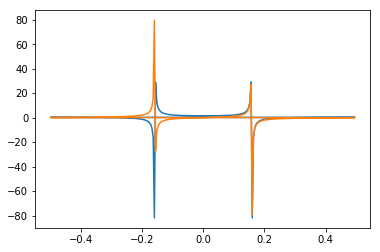

In [33]:
import matplotlib.pyplot as plt
t = np.arange(256)
sp = np.fft.fft(np.sin(t))
print len(sp)
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq, sp.real, freq, sp.imag)
plt.show()

In [17]:
src_2_unique_queries = (s_rdd.map(lambda s: ((s[1],s[3]),1))
                       .reduceByKey(lambda x,y: x+y)
                       .map(lambda s: (s[0][0],1))
                       .reduceByKey(lambda x,y: x+y)
                      )
print src_2_unique_queries.take(5)

[(u'10.9.120.227', 13), (u'10.8.147.102', 1), (u'140.180.219.162', 5), (u'10.9.42.157', 17), (u'10.9.131.13', 6)]


In [18]:
src_2_total_queries = (s_rdd.map(lambda s: (s[1],1))
                       .reduceByKey(lambda x,y: x+y)
                      )
print src_2_total_queries.take(5)

[(u'10.9.120.227', 25), (u'10.9.162.26', 35), (u'140.180.219.162', 14), (u'10.9.131.13', 7), (u'10.9.29.134', 30)]


In [1]:

            
    
add_domain('youtube.com')



print augmented_data.take(2)

NameError: name 's_rdd' is not defined